### ✏️Task
In this exercise, you should set up a neural network for a regression problem.
<br>The model should predict the runoff of the next day based on today's weather situation.
<br>Thus, you will need to shift the runoff column by one day, so one row always holds the weather features of day t and the runoff of day t+1.
<br>Also, remember to clean up the dataframe by dropping rows with NaN values.

In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

### 📖Load the data

In [2]:
df = pd.read_csv("./Data/Regression_Ruhr.csv", sep=";")
df.head(5)

,Date,Runoff,temp_mean_all,surface_temp_mean_all,relhum_mean_all,abshum_mean_all,dew_point_temp_mean_all,windspeed_mean,precipitation_sum_all,pressure_mean_all,global_radiation_short_wave_mean,global_radiation_long_wave_mean,precipitation_sum_730,precipitation_sum_550
0,01.11.2020,29.0,14.34,13.49,85.92,10.61,12.02,1.62,0.4,996.40,31.07,371.83,1.8,1.8
1,02.11.2020,29.9,16.61,15.46,82.22,11.59,13.52,2.71,3.7,994.49,19.26,382.23,2.2,2.2
2,03.11.2020,33.5,9.78,8.91,74.91,6.89,5.48,1.88,0.0,1006.25,65.65,289.45,0.0,0.0
3,04.11.2020,27.7,5.74,4.08,86.24,6.11,3.56,1.20,0.0,1015.95,55.58,271.99,0.0,0.0
4,05.11.2020,26.9,3.83,2.38,91.50,5.78,2.52,0.65,0.0,1022.44,55.81,278.90,0.0,0.0


### 📖Shift the runoff and drop na

In [3]:
df['Runoff'] = df['Runoff'].shift(-1) 
df.dropna(inplace=True)
df

,Date,Runoff,temp_mean_all,surface_temp_mean_all,relhum_mean_all,abshum_mean_all,dew_point_temp_mean_all,windspeed_mean,precipitation_sum_all,pressure_mean_all,global_radiation_short_wave_mean,global_radiation_long_wave_mean,precipitation_sum_730,precipitation_sum_550
0,01.11.2020,29.9,14.34,13.49,85.92,10.61,12.02,1.62,0.4,996.40,31.07,371.83,1.8,1.8
1,02.11.2020,33.5,16.61,15.46,82.22,11.59,13.52,2.71,3.7,994.49,19.26,382.23,2.2,2.2
2,03.11.2020,27.7,9.78,8.91,74.91,6.89,5.48,1.88,0.0,1006.25,65.65,289.45,0.0,0.0
3,04.11.2020,26.9,5.74,4.08,86.24,6.11,3.56,1.20,0.0,1015.95,55.58,271.99,0.0,0.0
4,05.11.2020,22.5,3.83,2.38,91.50,5.78,2.52,0.65,0.0,1022.44,55.81,278.90,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,26.12.2021,48.3,-1.09,-0.97,81.29,3.74,-3.87,1.05,0.1,991.08,13.13,307.03,0.2,0.2
421,27.12.2021,55.6,6.11,5.26,91.05,6.67,4.81,1.13,0.7,984.82,19.43,326.41,0.6,0.6
422,28.12.2021,90.5,8.06,6.84,91.65,7.60,6.83,1.66,8.4,978.89,14.65,331.43,9.5,9.5
423,29.12.2021,127.0,8.87,8.30,94.76,8.30,8.14,2.47,4.8,990.01,13.04,350.02,6.7,5.6


### 📖Divide into x and y

In [4]:
x = df.iloc[:, 2:]  # ["precipitation_sum_all", "precipitation_sum_730"]
y = df.iloc[:, 1]
x

,temp_mean_all,surface_temp_mean_all,relhum_mean_all,abshum_mean_all,dew_point_temp_mean_all,windspeed_mean,precipitation_sum_all,pressure_mean_all,global_radiation_short_wave_mean,global_radiation_long_wave_mean,precipitation_sum_730,precipitation_sum_550
0,14.34,13.49,85.92,10.61,12.02,1.62,0.4,996.40,31.07,371.83,1.8,1.8
1,16.61,15.46,82.22,11.59,13.52,2.71,3.7,994.49,19.26,382.23,2.2,2.2
2,9.78,8.91,74.91,6.89,5.48,1.88,0.0,1006.25,65.65,289.45,0.0,0.0
3,5.74,4.08,86.24,6.11,3.56,1.20,0.0,1015.95,55.58,271.99,0.0,0.0
4,3.83,2.38,91.50,5.78,2.52,0.65,0.0,1022.44,55.81,278.90,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
420,-1.09,-0.97,81.29,3.74,-3.87,1.05,0.1,991.08,13.13,307.03,0.2,0.2
421,6.11,5.26,91.05,6.67,4.81,1.13,0.7,984.82,19.43,326.41,0.6,0.6
422,8.06,6.84,91.65,7.60,6.83,1.66,8.4,978.89,14.65,331.43,9.5,9.5
423,8.87,8.30,94.76,8.30,8.14,2.47,4.8,990.01,13.04,350.02,6.7,5.6


### 📖Divide into train test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
input_size = X_train.shape[1]
print(input_size)
print(X_train.shape)

12
(340, 12)


### 📖Create normalisation layer

In [6]:
layer = tf.keras.layers.experimental.preprocessing.Normalization()
layer.adapt(X_train)

### 📖Create model

In [7]:
model = Sequential()
model.add(layer)
model.add(Dense(64, activation="sigmoid", input_shape=(input_size,)))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(1))

opt = keras.optimizers.SGD(learning_rate=0.002)
model.compile(optimizer=opt, loss="mean_squared_error") #loss=cost function

history = model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
11/11 [==============================] - 0s 1ms/step - loss: 3691.8992
Epoch 2/1000
11/11 [==============================] - 0s 1ms/step - loss: 2905.8987
Epoch 3/1000
11/11 [==============================] - 0s 1ms/step - loss: 2886.7927
Epoch 4/1000
11/11 [==============================] - 0s 800us/step - loss: 2843.7661
Epoch 5/1000
11/11 [==============================] - 0s 900us/step - loss: 2865.7400
Epoch 6/1000
11/11 [==============================] - 0s 900us/step - loss: 2864.8130
Epoch 7/1000
11/11 [==============================] - 0s 800us/step - loss: 2820.4348
Epoch 8/1000
11/11 [==============================] - 0s 900us/step - loss: 2812.0007
Epoch 9/1000
11/11 [==============================] - 0s 800us/step - loss: 2772.1824
Epoch 10/1000
11/11 [==============================] - 0s 800us/step - loss: 2771.5449
Epoch 11/1000
11/11 [==============================] - 0s 900us/step - loss: 2789.0496
Epoch 12/1000
11/11 [==============================] - 0s 

### 📖Plot loss

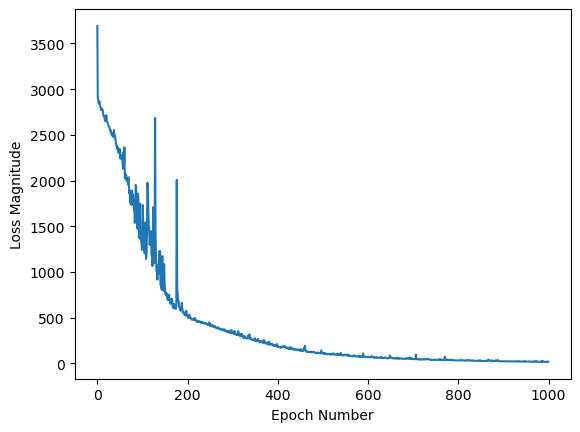

In [8]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])
plt.show()

In [9]:
position = 0
point = X_test.iloc[position].values.reshape(1,-1)
print(model.predict(point)[0,0])
print(y_test.iloc[position])

1/1 [==============================] - 0s 73ms/step
54.93676
48.3
